<a href="https://colab.research.google.com/github/Ricky0917/STAT-545/blob/main/worksheet_a05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Name:

Student ID:

# Worksheet A5: Working With Factors & Tibble Joins (20 points)
**Fall 2025**


There are 20 questions, each worth 1 point. Please submit this assignment on Canvas.

## Getting Started

Load the requirements for this worksheet:

In [151]:
suppressPackageStartupMessages(library(tidyverse))
suppressPackageStartupMessages(library(tsibble))
suppressPackageStartupMessages(library(gapminder))
suppressPackageStartupMessages(library(testthat))
suppressPackageStartupMessages(library(digest))
suppressMessages({
  time <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/songs.csv") %>%
    rename(song = title)
  album <- read_csv("https://raw.githubusercontent.com/STAT545-UBC/Classroom/master/data/singer/loc.csv") %>%
    select(title, everything()) %>%
    rename(song = title, album = release)
})
suppressMessages({
  fell <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Fellowship_Of_The_Ring.csv")
  ttow <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Two_Towers.csv")
  retk <- read_csv("https://raw.githubusercontent.com/jennybc/lotr-tidy/master/data/The_Return_Of_The_King.csv")
})

The following code chunk has been unlocked, to give you the flexibility to start this document with some of your own code. Remember, it's bad manners to keep a call to `install.packages()` in your source code, so don't forget to delete these lines if you ever need to run them.

In [152]:
# An unlocked code cell.
#install.packages("tsibble")
install.packages("gapminder")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)



# Part 0: Dates and Tsibble

We'll convert dates into a year-month object with the tsibble package (loaded at the start of the worksheet).

## Question 0.1

{points: 1}

Consider the built-in presidential dataset that looks at the start and ending terms of US presidents:

In [153]:
head(presidential)

name,start,end,party
<chr>,<date>,<date>,<chr>
Eisenhower,1953-01-20,1961-01-20,Republican
Kennedy,1961-01-20,1963-11-22,Democratic
Johnson,1963-11-22,1969-01-20,Democratic
Nixon,1969-01-20,1974-08-09,Republican
Ford,1974-08-09,1977-01-20,Republican
Carter,1977-01-20,1981-01-20,Democratic


Use `tsibble::yearmonth()` to convert the existing start and end column dates into include only the year and month (i.e., "1953 Jan" instead of 1953-01-20). Name this tibble `president_ym`.

```
president_ym <- presidential %>%
   mutate(start = FILL_THIS_IN,
          end = FILL_THIS_IN)
```

In [154]:
# your code here
president_ym <- presidential %>%
  mutate(start = yearmonth(start),
         end = yearmonth(end))
#fail() # No Answer - remove if you provide an answer
head(president_ym)

name,start,end,party
<chr>,<mth>,<mth>,<chr>
Eisenhower,1953 Jan,1961 Jan,Republican
Kennedy,1961 Jan,1963 Nov,Democratic
Johnson,1963 Nov,1969 Jan,Democratic
Nixon,1969 Jan,1974 Aug,Republican
Ford,1974 Aug,1977 Jan,Republican
Carter,1977 Jan,1981 Jan,Democratic


In [155]:
library(digest)
stopifnot("president_ym should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(president_ym)), "8811c")), "a3c6cc92dd463a3bebbcfa3a00e81e8e"))
stopifnot("dimensions of president_ym are not correct"= setequal(digest(paste(toString(dim(president_ym)), "8811c")), "f74f6d65bb40a50cc6951b51db24cf4e"))
stopifnot("column names of president_ym are not correct"= setequal(digest(paste(toString(sort(colnames(president_ym))), "8811c")), "729c7eaa6ac9b0ac7d38d379bd28936c"))
stopifnot("types of columns in president_ym are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(president_ym, class)))), "8811c")), "0e48f9967a5de4e5124c564562bdaa0a"))
stopifnot("values in one or more numerical columns in president_ym are not correct"= setequal(digest(paste(toString(if (any(sapply(president_ym, is.numeric))) sort(round(sapply(president_ym[, sapply(president_ym, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "8811c")), "e3347067539a6905f60971d870629af7"))
stopifnot("values in one or more character columns in president_ym are not correct"= setequal(digest(paste(toString(if (any(sapply(president_ym, is.character))) sum(sapply(president_ym[sapply(president_ym, is.character)], function(x) length(unique(x)))) else 0), "8811c")), "1a916d68b65c4704f91e19b86bb129ff"))
stopifnot("values in one or more factor columns in president_ym are not correct"= setequal(digest(paste(toString(if (any(sapply(president_ym, is.factor))) sum(sapply(president_ym[, sapply(president_ym, is.factor)], function(col) length(unique(col)))) else 0), "8811c")), "e3347067539a6905f60971d870629af7"))

print('Success!')

[1] "Success!"


# Part 1: Creating Factors

For the best experience working with factors in R, we will use the `forcats` package, which is part of the `tidyverse` metapackage.

## Question 1.1

{points: 1}


Using the gapminder dataset from the gapminder package, create a new data set named `gapminder_1997` that includes only data from 1997, and add a new column `life_level` containing 5 new levels according to the following table:

| Criteria          |`life_level`   |
|-------------------|-------------|
| less than 23      | very low    |
| between 23 and 48 | low         |
| between 48 and 59 | moderate    |
| between 59 and 70 | high        |
| more than 70      | very high   |


**Hint**: We are using `case_when()`, a tidier way to vectorise multiple `if_else()` statements.
You can read more about this function [in the tidyverse reference](https://dplyr.tidyverse.org/reference/case_when.html).

```
gapminder_1997 <- gapminder %>%
   FILL_THIS_IN(year == FILL_THIS_IN) %>%
   FILL_THIS_IN(life_level = case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                 FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                 TRUE ~ "very high"))
```

In [156]:
# your code here
gapminder_1997 <- gapminder %>%
  filter(year == 1997) %>%
  mutate(life_level = case_when(
    lifeExp < 23 ~ "very low",
    lifeExp < 48 ~ "low",
    lifeExp < 59 ~ "moderate",
    lifeExp < 70 ~ "high",
    TRUE ~ "very high"
  ))
#fail() # No Answer - remove if you provide an answer
head(gapminder_1997)

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<chr>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high


In [157]:
library(digest)
stopifnot("gapminder_1997 should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gapminder_1997)), "37d3f")), "3bdba6e8a844e989674e11cf2082e451"))
stopifnot("dimensions of gapminder_1997 are not correct"= setequal(digest(paste(toString(dim(gapminder_1997)), "37d3f")), "bd5a50f8bfe77b16654ce2e6bd91b3cb"))
stopifnot("column names of gapminder_1997 are not correct"= setequal(digest(paste(toString(sort(colnames(gapminder_1997))), "37d3f")), "574816bf9e392dadea4f3ebac3b19ad7"))
stopifnot("types of columns in gapminder_1997 are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gapminder_1997, class)))), "37d3f")), "e909c264323996a0262c1c246642779a"))
stopifnot("values in one or more numerical columns in gapminder_1997 are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997, is.numeric))) sort(round(sapply(gapminder_1997[, sapply(gapminder_1997, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "37d3f")), "aa388abc904b9e40173be7f0e9992982"))
stopifnot("values in one or more character columns in gapminder_1997 are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997, is.character))) sum(sapply(gapminder_1997[sapply(gapminder_1997, is.character)], function(x) length(unique(x)))) else 0), "37d3f")), "d1bff0133124c739e6076d276ec81487"))
stopifnot("values in one or more factor columns in gapminder_1997 are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997, is.factor))) sum(sapply(gapminder_1997[, sapply(gapminder_1997, is.factor)], function(col) length(unique(col)))) else 0), "37d3f")), "ea532649019a92729189abd3644de2b2"))

print('Success!')

[1] "Success!"


FYI: We can now plot boxplots for the GDP per capita per level of life expectancy.
Run the following code to see the boxplots.

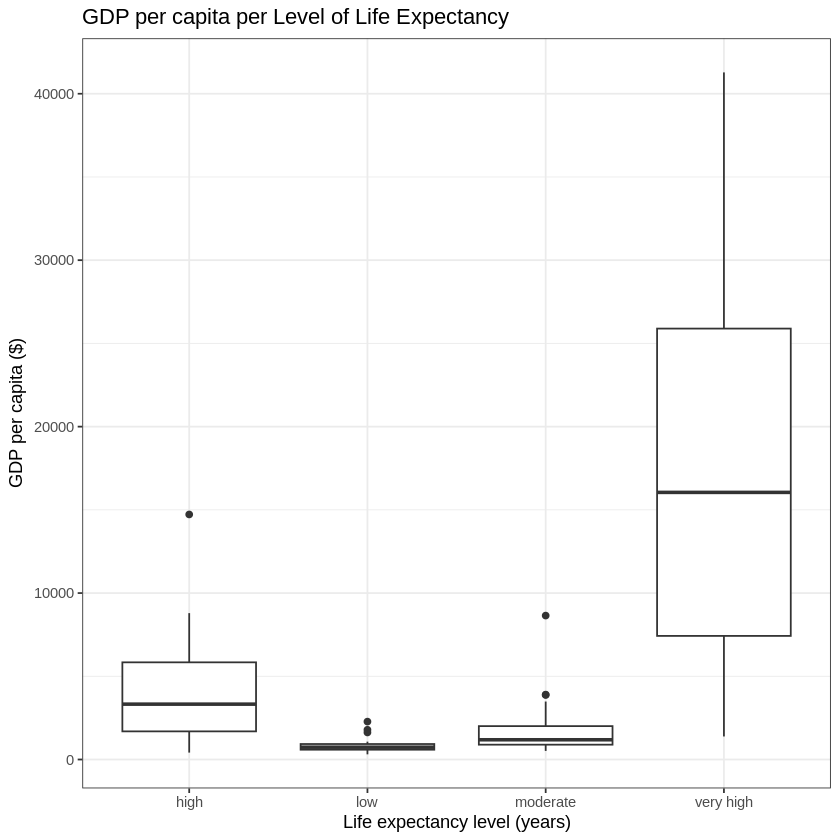

In [158]:
ggplot(gapminder_1997) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x = "Life expectancy level (years)") +
  ggtitle("GDP per capita per Level of Life Expectancy") +
  theme_bw()

## Question 1.2

{points: 1}


Notice a few oddities in the above plot:

- It seems that none of the countries had a "very low" life-expectancy in 1997.
- However, since it was an option in our analysis it should be included in our plot. Right?
- Notice also how levels on x-axis are placed in the "wrong" order. (in alphabetical order)

You can correct these issues by explicitly making `life_level` a factor and setting the levels parameter.
Create a new data frame as in Question 1.1, but make the column `life_level` a factor with levels **ordered** from *very low* to *very high*.
Store this new data frame in variable `gapminder_1997_fct`.

```
gapminder_1997_fct <- gapminder %>%
   FILL_THIS_IN(year == 1997) %>%
   FILL_THIS_IN(life_level = FILL_THIS_IN(case_when(FILL_THIS_IN < FILL_THIS_IN ~ "very low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "low",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "moderate",
                                        FILL_THIS_IN < FILL_THIS_IN ~ "high",
                                        TRUE ~ "very high"),
                              levels = c('FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN', 'FILL_THIS_IN')))
```

In [159]:
# your code here
gapminder_1997_fct <- gapminder %>%
  filter(year == 1997) %>%
  mutate(life_level = factor(
    case_when(
      lifeExp < 23 ~ "very low",
      lifeExp < 48 ~ "low",
      lifeExp < 59 ~ "moderate",
      lifeExp < 70 ~ "high",
      TRUE ~ "very high"
    ),
    levels = c("very low", "low", "moderate", "high", "very high")
  ))
#fail() # No Answer - remove if you provide an answer
head(gapminder_1997_fct)

country,continent,year,lifeExp,pop,gdpPercap,life_level
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>,<fct>
Afghanistan,Asia,1997,41.763,22227415,635.3414,low
Albania,Europe,1997,72.950,3428038,3193.0546,very high
Algeria,Africa,1997,69.152,29072015,4797.2951,high
Angola,Africa,1997,40.963,9875024,2277.1409,low
Argentina,Americas,1997,73.275,36203463,10967.2820,very high
Australia,Oceania,1997,78.830,18565243,26997.9366,very high


In [160]:
library(digest)
stopifnot("gapminder_1997_fct should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gapminder_1997_fct)), "7ab99")), "d211702e5ab6ed57b2f654acfb95faf0"))
stopifnot("dimensions of gapminder_1997_fct are not correct"= setequal(digest(paste(toString(dim(gapminder_1997_fct)), "7ab99")), "f4de55251732e824d56ed44b4d9b20c5"))
stopifnot("column names of gapminder_1997_fct are not correct"= setequal(digest(paste(toString(sort(colnames(gapminder_1997_fct))), "7ab99")), "db56c9bb48ae9aa778724fc61328b5a2"))
stopifnot("types of columns in gapminder_1997_fct are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gapminder_1997_fct, class)))), "7ab99")), "1f0014e7710854af76fdc3087367bbd0"))
stopifnot("values in one or more numerical columns in gapminder_1997_fct are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997_fct, is.numeric))) sort(round(sapply(gapminder_1997_fct[, sapply(gapminder_1997_fct, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "7ab99")), "7340f7fadbdf8e0e0dbf3f8c9f36d28b"))
stopifnot("values in one or more character columns in gapminder_1997_fct are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997_fct, is.character))) sum(sapply(gapminder_1997_fct[sapply(gapminder_1997_fct, is.character)], function(x) length(unique(x)))) else 0), "7ab99")), "6dd578b82fdabfb9e524767c62a4086b"))
stopifnot("values in one or more factor columns in gapminder_1997_fct are not correct"= setequal(digest(paste(toString(if (any(sapply(gapminder_1997_fct, is.factor))) sum(sapply(gapminder_1997_fct[, sapply(gapminder_1997_fct, is.factor)], function(col) length(unique(col)))) else 0), "7ab99")), "18043be51137e5afac676e1586c01d30"))

print('Success!')

[1] "Success!"


Run the following code to see the boxplots from the new data frame with life expectancy level as factor.

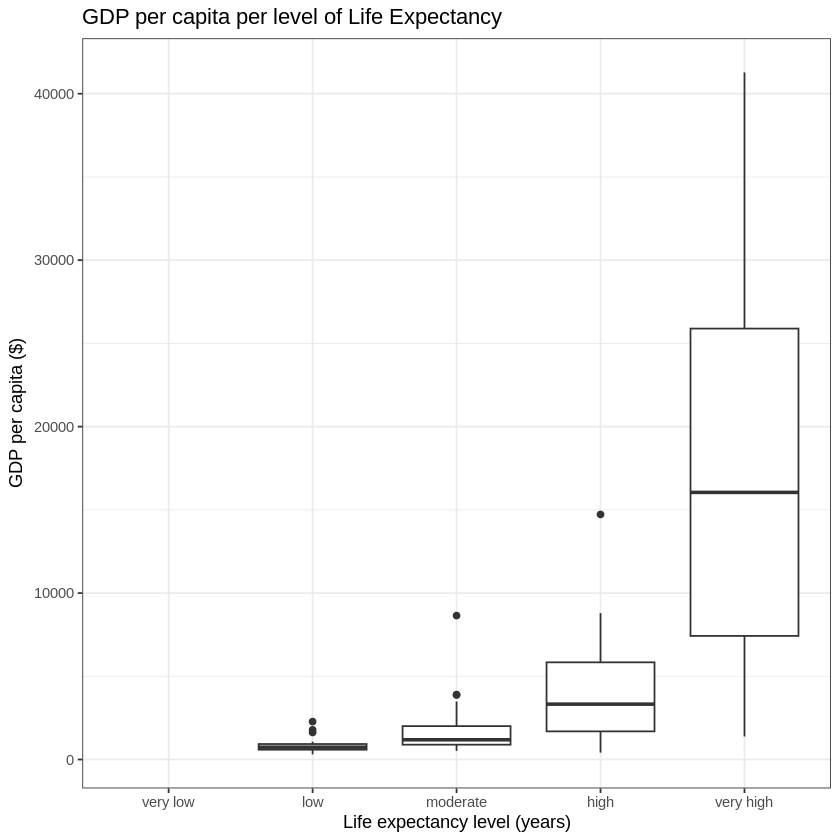

In [161]:
ggplot(gapminder_1997_fct) + geom_boxplot(aes(x = life_level, y = gdpPercap)) +
  labs(y = "GDP per capita ($)", x= "Life expectancy level (years)") +
  scale_x_discrete(drop = FALSE) + # Don't drop the very low factor
  ggtitle("GDP per capita per level of Life Expectancy") +
  theme_bw()

# Part 2: Inspecting Factors

In Part 1, you created your own factors, so now let's explore what categorical variables are in the `gapminder` dataset.

## Question 2.1

{points: 1}


What levels does the column `continent` have?
Assign the levels to variable `continent_levels`, using the `levels()` function. (To mix things up a bit, the template code we're giving you extracts a column using the Base R way of extracting columns -- with a dollar sign.)

```
continent_levels <- FILL_THIS_IN(gapminder$FILL_THIS_IN)
```

In [162]:
# your code here
continent_levels <- levels(gapminder$continent)
#fail()  No Answer - remove if you provide an answer
print(continent_levels)

[1] "Africa"   "Americas" "Asia"     "Europe"   "Oceania" 


In [163]:
library(digest)
stopifnot("type of continent_levels is not character"= setequal(digest(paste(toString(class(continent_levels)), "4895d")), "5d4ab01a44998464119edf7bbc8e49ff"))
stopifnot("length of continent_levels is not correct"= setequal(digest(paste(toString(length(continent_levels)), "4895d")), "b1755949b7863621be6cec5bbf34b659"))
stopifnot("value of continent_levels is not correct"= setequal(digest(paste(toString(tolower(continent_levels)), "4895d")), "412fb64cb3883de86557b584a0dadcdb"))
stopifnot("letters in string value of continent_levels are correct but case is not correct"= setequal(digest(paste(toString(continent_levels), "4895d")), "a65ebb2d7e1b0f8b01afbf3b9b92c0f7"))

print('Success!')

[1] "Success!"


## Question 2.2

{points: 1}


How many levels does the column `country` have?
Assign the number of levels to variable `gap_nr_countries`. Hint: there's a function called `nlevels()`.

```
gap_nr_countries <- FILL_THIS_IN(gapminder$FILL_THIS_IN)
```

In [164]:
# your code here
gap_nr_countries <- nlevels(gapminder$country)
#fail()  No Answer - remove if you provide an answer
print(gap_nr_countries)

[1] 142


In [165]:
library(digest)
stopifnot("type of gap_nr_countries is not integer"= setequal(digest(paste(toString(class(gap_nr_countries)), "9e480")), "3be9e582a1ad0a66c7cceafe5d05754d"))
stopifnot("length of gap_nr_countries is not correct"= setequal(digest(paste(toString(length(gap_nr_countries)), "9e480")), "3c193bd257ca5cba1b3d113f528d211f"))
stopifnot("values of gap_nr_countries are not correct"= setequal(digest(paste(toString(sort(gap_nr_countries)), "9e480")), "40eaf9c342a718472ef3c26b7a109724"))

print('Success!')

[1] "Success!"


## Question 2.3

{points: 1}

Consider we are only interested in the following 5 countries: Egypt, Haiti, Romania, Thailand, and Venezuela.
Create a new data frame with only these 5 countries and store it in variable `gap_5`. _Hint_: nothing new here -- use your dplyr knowledge!

```
gap_5 <- gapminder %>%
   FILL_THIS_IN(FILL_THIS_IN %in% c("FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN", "FILL_THIS_IN"))
```

In [166]:
# your code here
gap_5 <- gapminder %>%
  filter(country %in% c("Egypt", "Haiti", "Romania", "Thailand", "Venezuela"))
#fail()  No Answer - remove if you provide an answer
head(gap_5)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.822
Egypt,Africa,1957,44.444,25009741,1458.915
Egypt,Africa,1962,46.992,28173309,1693.336
Egypt,Africa,1967,49.293,31681188,1814.881
Egypt,Africa,1972,51.137,34807417,2024.008
Egypt,Africa,1977,53.319,38783863,2785.494


In [167]:
library(digest)
stopifnot("gap_5 should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_5)), "2f1a1")), "ee86417882d82e36b82411fcd0f4fa27"))
stopifnot("dimensions of gap_5 are not correct"= setequal(digest(paste(toString(dim(gap_5)), "2f1a1")), "81d06d285910da8d696011f71c495868"))
stopifnot("column names of gap_5 are not correct"= setequal(digest(paste(toString(sort(colnames(gap_5))), "2f1a1")), "e1b52f6074857db0bb25b4972f23fd37"))
stopifnot("types of columns in gap_5 are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_5, class)))), "2f1a1")), "7100c09ccb01e51c29d1ebe0cd1d5c8e"))
stopifnot("values in one or more numerical columns in gap_5 are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5, is.numeric))) sort(round(sapply(gap_5[, sapply(gap_5, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "2f1a1")), "5bf805de6d2c4f6a18587ed48ebef99b"))
stopifnot("values in one or more character columns in gap_5 are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5, is.character))) sum(sapply(gap_5[sapply(gap_5, is.character)], function(x) length(unique(x)))) else 0), "2f1a1")), "5d4b9850ddf17d08965c7819de2d43e2"))
stopifnot("values in one or more factor columns in gap_5 are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5, is.factor))) sum(sapply(gap_5[, sapply(gap_5, is.factor)], function(col) length(unique(col)))) else 0), "2f1a1")), "fbae95666a0e2aaabd9515d712d8b263"))

print('Success!')

[1] "Success!"


## Question 2.4

{points: 1}


However, subsetting the data set does not affect the levels of the factors.
The column `country` in tibble `gap_5` still has the same number of levels as in the original data frame.

Your task: create a new tibble from `gap_5`, where all unused levels from column `country` are dropped. _Hint_: use the `droplevels()` function. Store new new tibble in variable `gap_5_dropped`.

By way of demonstration, check the number of levels in the "country" column before and after the change -- we've included the code for this for you.

```
nlevels(gap_5$country)
gap_5_dropped <- FILL_THIS_IN(FILL_THIS_IN)
nlevels(gap_5_dropped$country)
```

In [168]:
# your code here
nlevels(gap_5$country)

gap_5_dropped <- droplevels(gap_5)

nlevels(gap_5_dropped$country)

#fail() # No Answer - remove if you provide an answer
head(gap_5_dropped)

[1] 142

[1] 5

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Egypt,Africa,1952,41.893,22223309,1418.822
Egypt,Africa,1957,44.444,25009741,1458.915
Egypt,Africa,1962,46.992,28173309,1693.336
Egypt,Africa,1967,49.293,31681188,1814.881
Egypt,Africa,1972,51.137,34807417,2024.008
Egypt,Africa,1977,53.319,38783863,2785.494


In [169]:
library(digest)
stopifnot("gap_5_dropped should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_5_dropped)), "48b97")), "f4d890e90f23ba5a97b1ed19b14e0307"))
stopifnot("dimensions of gap_5_dropped are not correct"= setequal(digest(paste(toString(dim(gap_5_dropped)), "48b97")), "cf3b8a8bca887e7a0af17a9b48b395f7"))
stopifnot("column names of gap_5_dropped are not correct"= setequal(digest(paste(toString(sort(colnames(gap_5_dropped))), "48b97")), "4dcfcb248186f6282514b0d7f90c04e8"))
stopifnot("types of columns in gap_5_dropped are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_5_dropped, class)))), "48b97")), "3c4239080bd11eb2d194ef8f7e9a47e3"))
stopifnot("values in one or more numerical columns in gap_5_dropped are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5_dropped, is.numeric))) sort(round(sapply(gap_5_dropped[, sapply(gap_5_dropped, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "48b97")), "e7dc2bf8bf9c0345af5f452cb38b050a"))
stopifnot("values in one or more character columns in gap_5_dropped are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5_dropped, is.character))) sum(sapply(gap_5_dropped[sapply(gap_5_dropped, is.character)], function(x) length(unique(x)))) else 0), "48b97")), "7e4b774275a507345b49cdbe11a3c8b9"))
stopifnot("values in one or more factor columns in gap_5_dropped are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_5_dropped, is.factor))) sum(sapply(gap_5_dropped[, sapply(gap_5_dropped, is.factor)], function(col) length(unique(col)))) else 0), "48b97")), "5ac0fb905505fb24dbb9b4b917749ae6"))

print('Success!')

[1] "Success!"


## Question 2.5

{points: 1}


The factor levels of column `continent` in data frame `gapminder` are ordered alphabetically.
Create a new data frame, with the levels of column `continent` in *increasing* order according to their frequency (i.e., the number of rows for each continent).
Store the new data frame in variable `gap_continent_freq`. *Hint*: Use `fct_infreq()` and `fct_rev()`.

```
gap_continent_freq <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN(continent)))
```

**Hint**: The first `FILL_THIS_IN` corresponds to a `fct_*` function that reverses the levels of the factors. The second `FILL_THIS_IN` correspond to a `fct_*` function that orders the levels by *decreasing* frequency.

In [170]:
# your code here
gap_continent_freq <- gapminder %>%
  mutate(continent = fct_rev(fct_infreq(continent)))
#fail()  No Answer - remove if you provide an answer
head(gap_continent_freq)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [171]:
library(digest)
stopifnot("gap_continent_freq should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_continent_freq)), "723dd")), "5d22966c4dc5d7fe7a3da096801ff7f7"))
stopifnot("dimensions of gap_continent_freq are not correct"= setequal(digest(paste(toString(dim(gap_continent_freq)), "723dd")), "ee987885c73573b99120d932d9a5fd08"))
stopifnot("column names of gap_continent_freq are not correct"= setequal(digest(paste(toString(sort(colnames(gap_continent_freq))), "723dd")), "9bbc3e2207321a2daa84afe6f53a5c7c"))
stopifnot("types of columns in gap_continent_freq are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_continent_freq, class)))), "723dd")), "20ed489335aed295c7ed4d4a3a23c79b"))
stopifnot("values in one or more numerical columns in gap_continent_freq are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_freq, is.numeric))) sort(round(sapply(gap_continent_freq[, sapply(gap_continent_freq, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "723dd")), "47d9febd40029de56e516afbd201f55a"))
stopifnot("values in one or more character columns in gap_continent_freq are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_freq, is.character))) sum(sapply(gap_continent_freq[sapply(gap_continent_freq, is.character)], function(x) length(unique(x)))) else 0), "723dd")), "2fab8faf00996b326564a0a4bf35bfad"))
stopifnot("values in one or more factor columns in gap_continent_freq are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_freq, is.factor))) sum(sapply(gap_continent_freq[, sapply(gap_continent_freq, is.factor)], function(col) length(unique(col)))) else 0), "723dd")), "c18069b4d164a7d8173b5c44a336f6ab"))

print('Success!')

[1] "Success!"


FYI: You can't "see" any difference in the tibble, but there are _attributes_ behind the hood keeping track of the order of the "continent" entries. You _can_ see the difference, however, in a plot, as below. Notice how the x-axis is no longer ordered alphabetically.

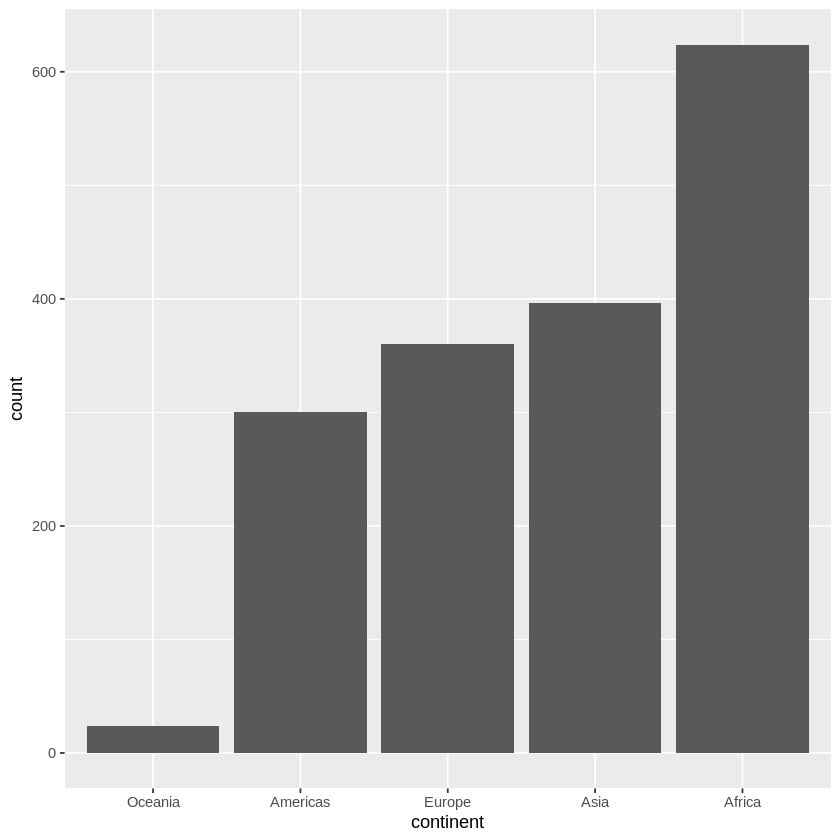

In [172]:
ggplot(gap_continent_freq, aes(continent)) + geom_bar()

## Question 2.6

{points: 1}


Again based on the `gapminder` data set, create another data frame, with the levels of column `continent` in *increasing* order of their average life expectancy (from column `lifeExp`).
Store the new data frame in variable `gap_continent_life`. _Hint_: use `fct_reorder()`.

```
gap_continent_life <- gapminder %>%
   mutate(continent = FILL_THIS_IN(FILL_THIS_IN, FILL_THIS_IN, FILL_THIS_IN))
```

In [173]:
# your code here
gap_continent_life <- gapminder %>%
   mutate(continent = fct_reorder(continent, lifeExp, .fun = mean))

#fail()  No Answer - remove if you provide an answer
head(gap_continent_life)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [174]:
library(digest)
stopifnot("gap_continent_life should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_continent_life)), "1b528")), "e348bdceb67b97360535e3edc81e762e"))
stopifnot("dimensions of gap_continent_life are not correct"= setequal(digest(paste(toString(dim(gap_continent_life)), "1b528")), "523a6812763c6363ec7c23513858e5f5"))
stopifnot("column names of gap_continent_life are not correct"= setequal(digest(paste(toString(sort(colnames(gap_continent_life))), "1b528")), "d2527105d38aabce31e17c56a5122dc5"))
stopifnot("types of columns in gap_continent_life are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_continent_life, class)))), "1b528")), "c3b2061bb68c622b5e9e013886166b8e"))
stopifnot("values in one or more numerical columns in gap_continent_life are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_life, is.numeric))) sort(round(sapply(gap_continent_life[, sapply(gap_continent_life, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "1b528")), "787f9af95ca20c69e39a8361b4b27f7e"))
stopifnot("values in one or more character columns in gap_continent_life are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_life, is.character))) sum(sapply(gap_continent_life[sapply(gap_continent_life, is.character)], function(x) length(unique(x)))) else 0), "1b528")), "92c4860f693a52888def9a8edfca3e44"))
stopifnot("values in one or more factor columns in gap_continent_life are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_continent_life, is.factor))) sum(sapply(gap_continent_life[, sapply(gap_continent_life, is.factor)], function(col) length(unique(col)))) else 0), "1b528")), "c2d13933b9497408f5fd6241d3aac0e0"))

print('Success!')

[1] "Success!"


Again, you can't "see" any difference in the tibble. But here's a plot that makes the difference clearer. Notice the ordering of the x-axis.

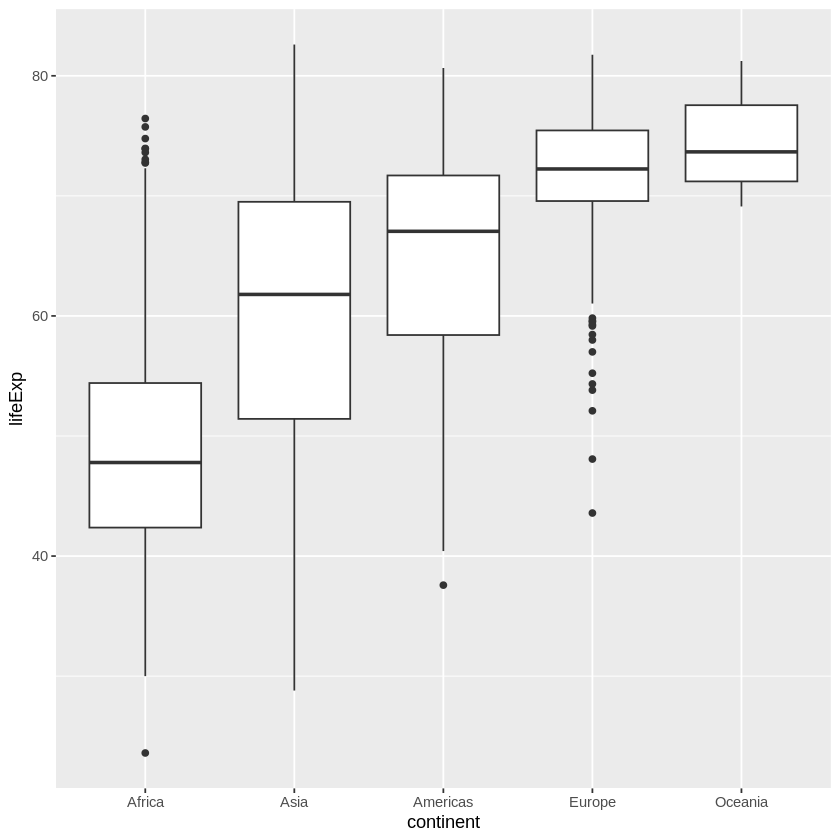

In [175]:
ggplot(gap_continent_life, aes(continent, lifeExp)) + geom_boxplot()

## Question 2.7

{points: 1}


Consider now you want to make comparisons between countries, relative to Canada.
Create a new data frame, with the levels of column `country` rearranged to have Canada as the first one.
Store the new data frame in variable `gap_canada_base`.

```
(gap_canada_base <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "FILL_THIS_IN")))
```

In [176]:
# your code here
gap_canada_base <- gapminder %>%
  mutate(country = fct_relevel(country, "Canada"))
#fail() # No Answer - remove if you provide an answer
head(gap_canada_base)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [177]:
library(digest)
stopifnot("gap_canada_base should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_canada_base)), "f9a4")), "e87dc3e585eecfd5e489572d377534d6"))
stopifnot("dimensions of gap_canada_base are not correct"= setequal(digest(paste(toString(dim(gap_canada_base)), "f9a4")), "067cb93c12c95300973ef7b58126e407"))
stopifnot("column names of gap_canada_base are not correct"= setequal(digest(paste(toString(sort(colnames(gap_canada_base))), "f9a4")), "a7c5f2af3f28ac304de4da3f401ee776"))
stopifnot("types of columns in gap_canada_base are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_canada_base, class)))), "f9a4")), "7cfb0bcdd54ce212ff80fcbec75226d3"))
stopifnot("values in one or more numerical columns in gap_canada_base are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_canada_base, is.numeric))) sort(round(sapply(gap_canada_base[, sapply(gap_canada_base, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "f9a4")), "0c2e2181e4d41e2d00b0534bf8f9e8f8"))
stopifnot("values in one or more character columns in gap_canada_base are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_canada_base, is.character))) sum(sapply(gap_canada_base[sapply(gap_canada_base, is.character)], function(x) length(unique(x)))) else 0), "f9a4")), "176a1710a984d17b0893503d00432f88"))
stopifnot("values in one or more factor columns in gap_canada_base are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_canada_base, is.factor))) sum(sapply(gap_canada_base[, sapply(gap_canada_base, is.factor)], function(col) length(unique(col)))) else 0), "f9a4")), "001b8fb0f157282e4d044f6d85bc2a02"))

print('Success!')

[1] "Success!"


Take a look at the levels of the "country" factor, and you'll now see Canada first:

In [178]:
gap_canada_base %>%
   pull(country) %>%
   levels()

[1] "Canada"                   "Afghanistan"             
  [3] "Albania"                  "Algeria"                 
  [5] "Angola"                   "Argentina"               
  [7] "Australia"                "Austria"                 
  [9] "Bahrain"                  "Bangladesh"              
 [11] "Belgium"                  "Benin"                   
 [13] "Bolivia"                  "Bosnia and Herzegovina"  
 [15] "Botswana"                 "Brazil"                  
 [17] "Bulgaria"                 "Burkina Faso"            
 [19] "Burundi"                  "Cambodia"                
 [21] "Cameroon"                 "Central African Republic"
 [23] "Chad"                     "Chile"                   
 [25] "China"                    "Colombia"                
 [27] "Comoros"                  "Congo, Dem. Rep."        
 [29] "Congo, Rep."              "Costa Rica"              
 [31] "Cote d'Ivoire"            "Croatia"                 
 [33] "Cuba"                     "Czech Republic"          
 [35] "Denmark"                  "Djibouti"                
 [37] "Dominican Republic"       "Ecuador"                 
 [39] "Egypt"                    "El Salvador"             
 [41] "Equatorial Guinea"        "Eritrea"                 
 [43] "Ethiopia"                 "Finland"                 
 [45] "France"                   "Gabon"                   
 [47] "Gambia"                   "Germany"                 
 [49] "Ghana"                    "Greece"                  
 [51] "Guatemala"                "Guinea"                  
 [53] "Guinea-Bissau"            "Haiti"                   
 [55] "Honduras"                 "Hong Kong, China"        
 [57] "Hungary"                  "Iceland"                 
 [59] "India"                    "Indonesia"               
 [61] "Iran"                     "Iraq"                    
 [63] "Ireland"                  "Israel"                  
 [65] "Italy"                    "Jamaica"                 
 [67] "Japan"                    "Jordan"                  
 [69] "Kenya"                    "Korea, Dem. Rep."        
 [71] "Korea, Rep."              "Kuwait"                  
 [73] "Lebanon"                  "Lesotho"                 
 [75] "Liberia"                  "Libya"                   
 [77] "Madagascar"               "Malawi"                  
 [79] "Malaysia"                 "Mali"                    
 [81] "Mauritania"               "Mauritius"               
 [83] "Mexico"                   "Mongolia"                
 [85] "Montenegro"               "Morocco"                 
 [87] "Mozambique"               "Myanmar"                 
 [89] "Namibia"                  "Nepal"                   
 [91] "Netherlands"              "New Zealand"             
 [93] "Nicaragua"                "Niger"                   
 [95] "Nigeria"                  "Norway"                  
 [97] "Oman"                     "Pakistan"                
 [99] "Panama"                   "Paraguay"                
[101] "Peru"                     "Philippines"             
[103] "Poland"                   "Portugal"                
[105] "Puerto Rico"              "Reunion"                 
[107] "Romania"                  "Rwanda"                  
[109] "Sao Tome and Principe"    "Saudi Arabia"            
[111] "Senegal"                  "Serbia"                  
[113] "Sierra Leone"             "Singapore"               
[115] "Slovak Republic"          "Slovenia"                
[117] "Somalia"                  "South Africa"            
[119] "Spain"                    "Sri Lanka"               
[121] "Sudan"                    "Swaziland"               
[123] "Sweden"                   "Switzerland"             
[125] "Syria"                    "Taiwan"                  
[127] "Tanzania"                 "Thailand"                
[129] "Togo"                     "Trinidad and Tobago"     
[131] "Tunisia"                  "Turkey"                  
[133] "Uganda"                   "United K

## Question 2.8

{points: 1}


Sometimes you want to manually change a few factor levels, e.g., if the level is too wide for plotting.
Based on the `gapminder` data set, create a new data frame with the Central African Republic renamed to *Central African Rep.* and Bosnia and Herzegovina renamed to *Bosnia & Herzegovina*.
Store the new data frame in variable `gap_car`. _Hint_: use `fct_recode()`.

```
gap_car <- gapminder %>%
   mutate(country = FILL_THIS_IN(FILL_THIS_IN, "Central African Rep." = "FILL_THIS_IN",
                               "Bosnia & Herzegovina" = "FILL_THIS_IN"))
```

In [179]:
# your code here
gap_car <- gapminder %>%
  mutate(country = fct_recode(country,
                              "Central African Rep." = "Central African Republic",
                              "Bosnia & Herzegovina" = "Bosnia and Herzegovina"))
#fail() # No Answer - remove if you provide an answer
head(gap_car)

country,continent,year,lifeExp,pop,gdpPercap
<fct>,<fct>,<int>,<dbl>,<int>,<dbl>
Afghanistan,Asia,1952,28.801,8425333,779.4453
Afghanistan,Asia,1957,30.332,9240934,820.8530
Afghanistan,Asia,1962,31.997,10267083,853.1007
Afghanistan,Asia,1967,34.020,11537966,836.1971
Afghanistan,Asia,1972,36.088,13079460,739.9811
Afghanistan,Asia,1977,38.438,14880372,786.1134


In [180]:
library(digest)
stopifnot("gap_car should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(gap_car)), "5b459")), "78b77797ae649112bd236b7dbc5c5ba5"))
stopifnot("dimensions of gap_car are not correct"= setequal(digest(paste(toString(dim(gap_car)), "5b459")), "9fe4db85ee3e8168cd113852d9033271"))
stopifnot("column names of gap_car are not correct"= setequal(digest(paste(toString(sort(colnames(gap_car))), "5b459")), "e27cf649363b23f003f1a5421b41a42f"))
stopifnot("types of columns in gap_car are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(gap_car, class)))), "5b459")), "53234702a2726cd1541d04fdb81ea7ba"))
stopifnot("values in one or more numerical columns in gap_car are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_car, is.numeric))) sort(round(sapply(gap_car[, sapply(gap_car, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "5b459")), "1bfbb448ef0edf4e4e946dbcce36d682"))
stopifnot("values in one or more character columns in gap_car are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_car, is.character))) sum(sapply(gap_car[sapply(gap_car, is.character)], function(x) length(unique(x)))) else 0), "5b459")), "f42722a1ee2f45ae9b42e503075f657f"))
stopifnot("values in one or more factor columns in gap_car are not correct"= setequal(digest(paste(toString(if (any(sapply(gap_car, is.factor))) sum(sapply(gap_car[, sapply(gap_car, is.factor)], function(col) length(unique(col)))) else 0), "5b459")), "b2b366d9d395949dde2202e071d55740"))

print('Success!')

[1] "Success!"


# Part 3: Tibble Joins

At the start of this worksheet, we loaded a couple datasets from the [singer](https://github.com/JoeyBernhardt/singer) package, and called them `time` and `album`. These two data sets contain information about a few popular songs and albums.

We'll practice various joins using these two datasets. You'll need to find out which join is appropriate for each case!

Run the following R codes to look at the two data sets:

In [181]:
head(time)

song,artist_name,year
<chr>,<chr>,<dbl>
Corduroy,Pearl Jam,1994
Grievance,Pearl Jam,2000
Stupidmop,Pearl Jam,1994
Present Tense,Pearl Jam,1996
MFC,Pearl Jam,1998
Lukin,Pearl Jam,1996


In [182]:
head(album)

song,artist_name,city,album
<chr>,<chr>,<chr>,<chr>
Grievance,Pearl Jam,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,"Seattle, WA",No Code
MFC,Pearl Jam,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,"Seattle, WA",Seattle Washington November 5 2000
Stuck On Amber,The Boo Radleys,"Liverpool, England",Wake Up!


## Question 3.1

{points: 1}


Create a new data frame containing all songs from `time` that have a corresponding album in the `album` dataset, while also adding the album information. Store the joined data set in variable `songs_with_album`.

```
songs_with_album <- time %>%
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [183]:
# your code here
songs_with_album <- time %>%
  inner_join(album, by = c("song", "artist_name"))
#fail() # No Answer - remove if you provide an answer
head(songs_with_album)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000
It's Lulu,The Boo Radleys,1995,"Liverpool, England",Best Of


In [184]:
library(digest)
stopifnot("songs_with_album should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(songs_with_album)), "b819e")), "ff6a1db82ac699a9b4cee31ff08aa569"))
stopifnot("dimensions of songs_with_album are not correct"= setequal(digest(paste(toString(dim(songs_with_album)), "b819e")), "e1aa822f43dd8d797f0534665dee35cb"))
stopifnot("column names of songs_with_album are not correct"= setequal(digest(paste(toString(sort(colnames(songs_with_album))), "b819e")), "11c75527436b344a3f6a5ce02c279db9"))
stopifnot("types of columns in songs_with_album are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(songs_with_album, class)))), "b819e")), "048e7f001613e27e5e613ebb525952d4"))
stopifnot("values in one or more numerical columns in songs_with_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_with_album, is.numeric))) sort(round(sapply(songs_with_album[, sapply(songs_with_album, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "b819e")), "47a272bf8571aa55c865aba66b596b77"))
stopifnot("values in one or more character columns in songs_with_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_with_album, is.character))) sum(sapply(songs_with_album[sapply(songs_with_album, is.character)], function(x) length(unique(x)))) else 0), "b819e")), "fa9bb75a460a99cc9c4c842aaabaa5bb"))
stopifnot("values in one or more factor columns in songs_with_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_with_album, is.factor))) sum(sapply(songs_with_album[, sapply(songs_with_album, is.factor)], function(col) length(unique(col)))) else 0), "b819e")), "72dd67fb8c4639867505180a00642ff6"))

print('Success!')

[1] "Success!"


## Question 3.2

{points: 1}


Go ahead and add the corresponding albums to the `time` tibble, being sure to preserve rows even if album info is not readily available.
Store the joined data set in variable `all_songs`.

```
all_songs <- time %>%
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [185]:
# your code here
all_songs <- time %>%
  left_join(album, by = c("song", "artist_name"))
#fail() # No Answer - remove if you provide an answer
head(all_songs)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Corduroy,Pearl Jam,1994,NA,NA
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000


In [186]:
library(digest)
stopifnot("all_songs should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(all_songs)), "ac396")), "c5901f0efdde4adc7d33a12156019110"))
stopifnot("dimensions of all_songs are not correct"= setequal(digest(paste(toString(dim(all_songs)), "ac396")), "b1a11be261e02d10a1cbea8ca1973a32"))
stopifnot("column names of all_songs are not correct"= setequal(digest(paste(toString(sort(colnames(all_songs))), "ac396")), "2da0d8a9b2fcd889695e672deee0a830"))
stopifnot("types of columns in all_songs are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(all_songs, class)))), "ac396")), "6fc0f55e3976f387ebbde1dd2b189cfd"))
stopifnot("values in one or more numerical columns in all_songs are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs, is.numeric))) sort(round(sapply(all_songs[, sapply(all_songs, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "ac396")), "ea7d64d4526fa10fe9df32cc9d7e6006"))
stopifnot("values in one or more character columns in all_songs are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs, is.character))) sum(sapply(all_songs[sapply(all_songs, is.character)], function(x) length(unique(x)))) else 0), "ac396")), "4b0e64b7b7b3d60e8be247c7bd6e0468"))
stopifnot("values in one or more factor columns in all_songs are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs, is.factor))) sum(sapply(all_songs[, sapply(all_songs, is.factor)], function(col) length(unique(col)))) else 0), "ac396")), "b66429c1429310f33677aa40767fc0d6"))

print('Success!')

[1] "Success!"


## Question 3.3: Joining Rows by Columns

{points: 1}


Create a new tibble with songs from `time` for which there is no album info.
Store the new data set in variable `songs_without_album`.

```
songs_without_album <- time %>%
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [187]:
# your code here
songs_without_album <- time %>%
  anti_join(album, by = c("song", "artist_name"))
#fail()  No Answer - remove if you provide an answer
head(songs_without_album)

song,artist_name,year
<chr>,<chr>,<dbl>
Corduroy,Pearl Jam,1994
Martin_ Doom! It's Seven O'Clock,The Boo Radleys,1995
Leaves And Sand,The Boo Radleys,1993
Comb Your Hair,The Boo Radleys,1998
Mine Again,Mariah Carey,2005
Don't Forget About Us,Mariah Carey,2005


In [188]:
library(digest)
stopifnot("songs_without_album should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(songs_without_album)), "a88fc")), "8db11c32ed7f89a90180eea77e374e99"))
stopifnot("dimensions of songs_without_album are not correct"= setequal(digest(paste(toString(dim(songs_without_album)), "a88fc")), "1c48642e3e094ae740024eb8a5223752"))
stopifnot("column names of songs_without_album are not correct"= setequal(digest(paste(toString(sort(colnames(songs_without_album))), "a88fc")), "613b6dc858b0534ec7491fc511cf52a9"))
stopifnot("types of columns in songs_without_album are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(songs_without_album, class)))), "a88fc")), "42359bf5b0a7b2af3062046f3ad2a557"))
stopifnot("values in one or more numerical columns in songs_without_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_without_album, is.numeric))) sort(round(sapply(songs_without_album[, sapply(songs_without_album, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "a88fc")), "d6c0734c386da7b99cfe10b0f2f1f501"))
stopifnot("values in one or more character columns in songs_without_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_without_album, is.character))) sum(sapply(songs_without_album[sapply(songs_without_album, is.character)], function(x) length(unique(x)))) else 0), "a88fc")), "6d0d44ada2dcb03fa2ce397ceb36da6e"))
stopifnot("values in one or more factor columns in songs_without_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_without_album, is.factor))) sum(sapply(songs_without_album[, sapply(songs_without_album, is.factor)], function(col) length(unique(col)))) else 0), "a88fc")), "3062ea57e3b3080241118cd522a46669"))

print('Success!')

[1] "Success!"


## Question 3.4

{points: 1}


Create a new tibble with all songs from artists for whom there is no album information.
Store the new data set in variable `songs_artists_no_album`.

```
songs_artists_no_album <- time %>%
  FILL_THIS_IN(FILL_THIS_IN, by = "FILL_THIS_IN")
```

In [189]:
# your code here
songs_artists_no_album <- time %>%
  anti_join(album, by = "artist_name")

#fail() # No Answer - remove if you provide an answer
head(songs_artists_no_album)

song,artist_name,year
<chr>,<chr>,<dbl>
Mine Again,Mariah Carey,2005
Don't Forget About Us,Mariah Carey,2005
Babydoll,Mariah Carey,1997
Don't Forget About Us,Mariah Carey,2005
Vision Of Love,Mariah Carey,1990


In [190]:
library(digest)
stopifnot("songs_artists_no_album should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(songs_artists_no_album)), "48b20")), "167d8f7c1b10fd4768cb1d84e1ebaee1"))
stopifnot("dimensions of songs_artists_no_album are not correct"= setequal(digest(paste(toString(dim(songs_artists_no_album)), "48b20")), "b706eeea584cc496d448fe7106be2438"))
stopifnot("column names of songs_artists_no_album are not correct"= setequal(digest(paste(toString(sort(colnames(songs_artists_no_album))), "48b20")), "abe8594012949a11f6293bbed07de283"))
stopifnot("types of columns in songs_artists_no_album are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(songs_artists_no_album, class)))), "48b20")), "699d26040c0a852ca53481e9bbb42bba"))
stopifnot("values in one or more numerical columns in songs_artists_no_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_artists_no_album, is.numeric))) sort(round(sapply(songs_artists_no_album[, sapply(songs_artists_no_album, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "48b20")), "b5ae4683063e641d48e5d2c83e0dc221"))
stopifnot("values in one or more character columns in songs_artists_no_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_artists_no_album, is.character))) sum(sapply(songs_artists_no_album[sapply(songs_artists_no_album, is.character)], function(x) length(unique(x)))) else 0), "48b20")), "052ff6bbdd0bd754fc5169b455346309"))
stopifnot("values in one or more factor columns in songs_artists_no_album are not correct"= setequal(digest(paste(toString(if (any(sapply(songs_artists_no_album, is.factor))) sum(sapply(songs_artists_no_album[, sapply(songs_artists_no_album, is.factor)], function(col) length(unique(col)))) else 0), "48b20")), "2dfe7c0fb5904fc4c7ed1bfd794c2f5f"))

print('Success!')

[1] "Success!"


## Question 3.5

{points: 1}


Create a new tibble with all the information from both tibbles, regardless of no corresponding information being present in the other tibble.
Store the new data set in variable `all_songs_and_albums`.

```
all_songs_and_albums <- time %>%
  FILL_THIS_IN(FILL_THIS_IN, by = c("FILL_THIS_IN", "FILL_THIS_IN"))
```

In [191]:
# your code here
all_songs_and_albums <- time %>%
  full_join(album, by = c("song", "artist_name"))
#fail() # No Answer - remove if you provide an answer
head(all_songs_and_albums)

song,artist_name,year,city,album
<chr>,<chr>,<dbl>,<chr>,<chr>
Corduroy,Pearl Jam,1994,NA,NA
Grievance,Pearl Jam,2000,"Seattle, WA",Binaural
Stupidmop,Pearl Jam,1994,"Seattle, WA",Vitalogy
Present Tense,Pearl Jam,1996,"Seattle, WA",No Code
MFC,Pearl Jam,1998,"Seattle, WA",Live On Two Legs
Lukin,Pearl Jam,1996,"Seattle, WA",Seattle Washington November 5 2000


In [192]:
library(digest)
stopifnot("all_songs_and_albums should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(all_songs_and_albums)), "9740c")), "0466f7b06251ba974d4b867a7db35983"))
stopifnot("dimensions of all_songs_and_albums are not correct"= setequal(digest(paste(toString(dim(all_songs_and_albums)), "9740c")), "7dccfe1fbcbf928b818906abe85fb3de"))
stopifnot("column names of all_songs_and_albums are not correct"= setequal(digest(paste(toString(sort(colnames(all_songs_and_albums))), "9740c")), "7a86961d54f6a7e9504528e4a80f3235"))
stopifnot("types of columns in all_songs_and_albums are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(all_songs_and_albums, class)))), "9740c")), "15ca0d9fdda8cf02d055b1cc071528f7"))
stopifnot("values in one or more numerical columns in all_songs_and_albums are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs_and_albums, is.numeric))) sort(round(sapply(all_songs_and_albums[, sapply(all_songs_and_albums, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "9740c")), "e823c3dcd4895e0f069f5e865f8808e3"))
stopifnot("values in one or more character columns in all_songs_and_albums are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs_and_albums, is.character))) sum(sapply(all_songs_and_albums[sapply(all_songs_and_albums, is.character)], function(x) length(unique(x)))) else 0), "9740c")), "845357d176b54b8487cf01a589561a8c"))
stopifnot("values in one or more factor columns in all_songs_and_albums are not correct"= setequal(digest(paste(toString(if (any(sapply(all_songs_and_albums, is.factor))) sum(sapply(all_songs_and_albums[, sapply(all_songs_and_albums, is.factor)], function(col) length(unique(col)))) else 0), "9740c")), "545e3b500de6bab9c3c2c8e91f1143b7"))

print('Success!')

[1] "Success!"


## Part 4: Concatenating Rows

At the start of the worksheet, we loaded three Lord of the Rings datasets (one for each of the three movies). Run the following R codes to take a look at the 3 tibbles:

In [193]:
fell

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Fellowship Of The Ring,Elf,1229,971
The Fellowship Of The Ring,Hobbit,14,3644
The Fellowship Of The Ring,Man,0,1995


In [194]:
ttow

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Two Towers,Elf,331,513
The Two Towers,Hobbit,0,2463
The Two Towers,Man,401,3589


In [195]:
retk

Film,Race,Female,Male
<chr>,<chr>,<dbl>,<dbl>
The Return Of The King,Elf,183,510
The Return Of The King,Hobbit,2,2673
The Return Of The King,Man,268,2459


## Question 4.1

{points: 1}


Combine the three data sets into a single tibble, storing the new tibble in variable `lotr`.

```
lotr <- FILL_THIS_IN(fell, ttow, retk)
```

In [196]:
# your code here
lotr <- bind_rows(fell, ttow, retk)
#fail() # No Answer - remove if you provide an answer
print(lotr)

# A tibble: 9 × 4
  Film                       Race   Female  Male
  <chr>                      <chr>   <dbl> <dbl>
1 The Fellowship Of The Ring Elf      1229   971
2 The Fellowship Of The Ring Hobbit     14  3644
3 The Fellowship Of The Ring Man         0  1995
4 The Two Towers             Elf       331   513
5 The Two Towers             Hobbit      0  2463
6 The Two Towers             Man       401  3589
7 The Return Of The King     Elf       183   510
8 The Return Of The King     Hobbit      2  2673
9 The Return Of The King     Man       268  2459


In [197]:
library(digest)
stopifnot("lotr should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(lotr)), "6b563")), "4b1e369d9296e24ad7da503818b2e2b3"))
stopifnot("dimensions of lotr are not correct"= setequal(digest(paste(toString(dim(lotr)), "6b563")), "bc3b9f15a5bc257d25f363deba55304e"))
stopifnot("column names of lotr are not correct"= setequal(digest(paste(toString(sort(colnames(lotr))), "6b563")), "b2f946def641d930904063558ba61cc6"))
stopifnot("types of columns in lotr are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(lotr, class)))), "6b563")), "0e93b6b2aca72b0b33f8a4ab6fc66453"))
stopifnot("values in one or more numerical columns in lotr are not correct"= setequal(digest(paste(toString(if (any(sapply(lotr, is.numeric))) sort(round(sapply(lotr[, sapply(lotr, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "6b563")), "ec32631faa5ccb790b28313727a2f507"))
stopifnot("values in one or more character columns in lotr are not correct"= setequal(digest(paste(toString(if (any(sapply(lotr, is.character))) sum(sapply(lotr[sapply(lotr, is.character)], function(x) length(unique(x)))) else 0), "6b563")), "ec97d0a32dbfbe5dbab1f9ba1b233b21"))
stopifnot("values in one or more factor columns in lotr are not correct"= setequal(digest(paste(toString(if (any(sapply(lotr, is.factor))) sum(sapply(lotr[, sapply(lotr, is.factor)], function(col) length(unique(col)))) else 0), "6b563")), "06e82e3680e813fd12a02f9e1b8cf81d"))

print('Success!')

[1] "Success!"


# Part 5: Set Operations

Let's use three set functions: `intersect()`, `union()` and `setdiff()`.
They work for data frames with the same column names.

We'll work with two toy tibbles named `y` and `z`, similar to the Data Wrangling Cheatsheet.

Run the following R codes to create the data.

In [198]:
(y <-  tibble(x1 = LETTERS[1:3], x2 = 1:3))

x1,x2
<chr>,<int>
A,1
B,2
C,3


In [199]:
(z <- tibble(x1 = c("B", "C", "D"), x2 = 2:4))

x1,x2
<chr>,<int>
B,2
C,3
D,4


## Question 5.1

{points: 1}


Use one of the three methods mentioned above to create a new data set which contains all rows that appear in both `y` and `z`.
Store the new data frame in variable `in_both`

```
in_both <- FILL_THIS_IN(y, z)
```

In [200]:
# your code here
in_both <- intersect(y, z)
#fail() # No Answer - remove if you provide an answer
in_both

x1,x2
<chr>,<int>
B,2
C,3


In [201]:
library(digest)
stopifnot("in_both should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(in_both)), "340f3")), "0fdfcd0e39c47f65fe5fc832f0961f7a"))
stopifnot("dimensions of in_both are not correct"= setequal(digest(paste(toString(dim(in_both)), "340f3")), "551fb8273da22ecfac76f460fbbbefd5"))
stopifnot("column names of in_both are not correct"= setequal(digest(paste(toString(sort(colnames(in_both))), "340f3")), "525fc58529d9493e7bfea7ee1770b92f"))
stopifnot("types of columns in in_both are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(in_both, class)))), "340f3")), "8cc94a69e665a57259180c55c46cec91"))
stopifnot("values in one or more numerical columns in in_both are not correct"= setequal(digest(paste(toString(if (any(sapply(in_both, is.numeric))) sort(round(sapply(in_both[, sapply(in_both, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "340f3")), "b90fed7f71eff97e4bbfb26fb19b9654"))
stopifnot("values in one or more character columns in in_both are not correct"= setequal(digest(paste(toString(if (any(sapply(in_both, is.character))) sum(sapply(in_both[sapply(in_both, is.character)], function(x) length(unique(x)))) else 0), "340f3")), "4782c87697c6ff8a422f1bb83f698146"))
stopifnot("values in one or more factor columns in in_both are not correct"= setequal(digest(paste(toString(if (any(sapply(in_both, is.factor))) sum(sapply(in_both[, sapply(in_both, is.factor)], function(col) length(unique(col)))) else 0), "340f3")), "546d7335ba63d60a5944dc98bd999a12"))

print('Success!')

[1] "Success!"


## Question 5.2

{points: 1}


Assume that rows in `y` are from *Day 1* and rows in `z` are from *Day 2*.
Create a new data set with all rows from `y` and `z`, as well as an additional column `day` which is *Day 1* for rows from `y` and *Day 2* for rows from `z`.
Store the new data set in variable `both_days`.

```
both_days <- FILL_THIS_IN(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
)
```

In [202]:
# your code here
both_days <- bind_rows(
  mutate(y, day = "Day 1"),
  mutate(z, day = "Day 2")
)
#fail() # No Answer - remove if you provide an answer
both_days

x1,x2,day
<chr>,<int>,<chr>
A,1,Day 1
B,2,Day 1
C,3,Day 1
B,2,Day 2
C,3,Day 2
D,4,Day 2


In [203]:
library(digest)
stopifnot("both_days should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(both_days)), "202a5")), "1f791d40107d0d860776ccfa126c2c37"))
stopifnot("dimensions of both_days are not correct"= setequal(digest(paste(toString(dim(both_days)), "202a5")), "3d66df6bd87f7de9290f12e747a9ad3a"))
stopifnot("column names of both_days are not correct"= setequal(digest(paste(toString(sort(colnames(both_days))), "202a5")), "f4b893debdf466715930074233ee9803"))
stopifnot("types of columns in both_days are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(both_days, class)))), "202a5")), "5845d63442307ba260807961fb301049"))
stopifnot("values in one or more numerical columns in both_days are not correct"= setequal(digest(paste(toString(if (any(sapply(both_days, is.numeric))) sort(round(sapply(both_days[, sapply(both_days, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "202a5")), "56be2548d87efe64f9e5fd9336f96a72"))
stopifnot("values in one or more character columns in both_days are not correct"= setequal(digest(paste(toString(if (any(sapply(both_days, is.character))) sum(sapply(both_days[sapply(both_days, is.character)], function(x) length(unique(x)))) else 0), "202a5")), "5d0b0adb84e57a77c3008b21c1fecd0e"))
stopifnot("values in one or more factor columns in both_days are not correct"= setequal(digest(paste(toString(if (any(sapply(both_days, is.factor))) sum(sapply(both_days[, sapply(both_days, is.factor)], function(col) length(unique(col)))) else 0), "202a5")), "28989e05824b24482282fa796ec7b6f6"))

print('Success!')

[1] "Success!"


## Question 5.3

{points: 1}


The rows contained in `z` are bad.
Use one of the three methods mentioned above to create a new data set which contains only the rows from `y` which are not in `z`.
Store the new data frame in variable `only_y`

```
only_y <- FILL_THIS_IN(y, z)
```

In [204]:
# your code here
only_y <- setdiff(y, z)
#fail() # No Answer - remove if you provide an answer
only_y

x1,x2
<chr>,<int>
A,1


In [205]:
library(digest)
stopifnot("only_y should be a data frame"= setequal(digest(paste(toString('data.frame' %in% class(only_y)), "67641")), "66c80fdbdbebabad2e4163824b036b13"))
stopifnot("dimensions of only_y are not correct"= setequal(digest(paste(toString(dim(only_y)), "67641")), "f5cf343ba981f808b0fccd5cf9c22f71"))
stopifnot("column names of only_y are not correct"= setequal(digest(paste(toString(sort(colnames(only_y))), "67641")), "38cf2b2a4ea7256eaebf2cfa3b9379d2"))
stopifnot("types of columns in only_y are not correct"= setequal(digest(paste(toString(sort(unlist(sapply(only_y, class)))), "67641")), "353d5ea15366dc7223060942ea61ebfd"))
stopifnot("values in one or more numerical columns in only_y are not correct"= setequal(digest(paste(toString(if (any(sapply(only_y, is.numeric))) sort(round(sapply(only_y[, sapply(only_y, is.numeric)], sum, na.rm = TRUE), 2)) else 0), "67641")), "dc4efb6e2bf609a614713b6a474898e0"))
stopifnot("values in one or more character columns in only_y are not correct"= setequal(digest(paste(toString(if (any(sapply(only_y, is.character))) sum(sapply(only_y[sapply(only_y, is.character)], function(x) length(unique(x)))) else 0), "67641")), "dc4efb6e2bf609a614713b6a474898e0"))
stopifnot("values in one or more factor columns in only_y are not correct"= setequal(digest(paste(toString(if (any(sapply(only_y, is.factor))) sum(sapply(only_y[, sapply(only_y, is.factor)], function(col) length(unique(col)))) else 0), "67641")), "97e2bd67054737fb0470881784ee18ac"))

print('Success!')

[1] "Success!"


Great work! 👏
Please Restart and Run all, check for errors, Save, and submit this worksheet on Canvas.


### Attribution

Assembled by Almas Khan and Vincenzo Coia, reviewed by Diana Lin, and assisted by David Kepplinger.